# Exploratory Data Analysis

In this notebook we will explore the data and try to understand the data better.

**Importing Libraries**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

**Loading Data**

In [2]:
# Load the data
data = pd.read_csv('../data/train.csv')
data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


## EDA on Category Features

In [3]:
# Summary statistics for the 'category' feature
category_summary = data['category'].describe()
print(category_summary)

count                      93686
unique                        15
top       Online Financial Fraud
freq                       57434
Name: category, dtype: object


Let's start with analysis of Category feature.

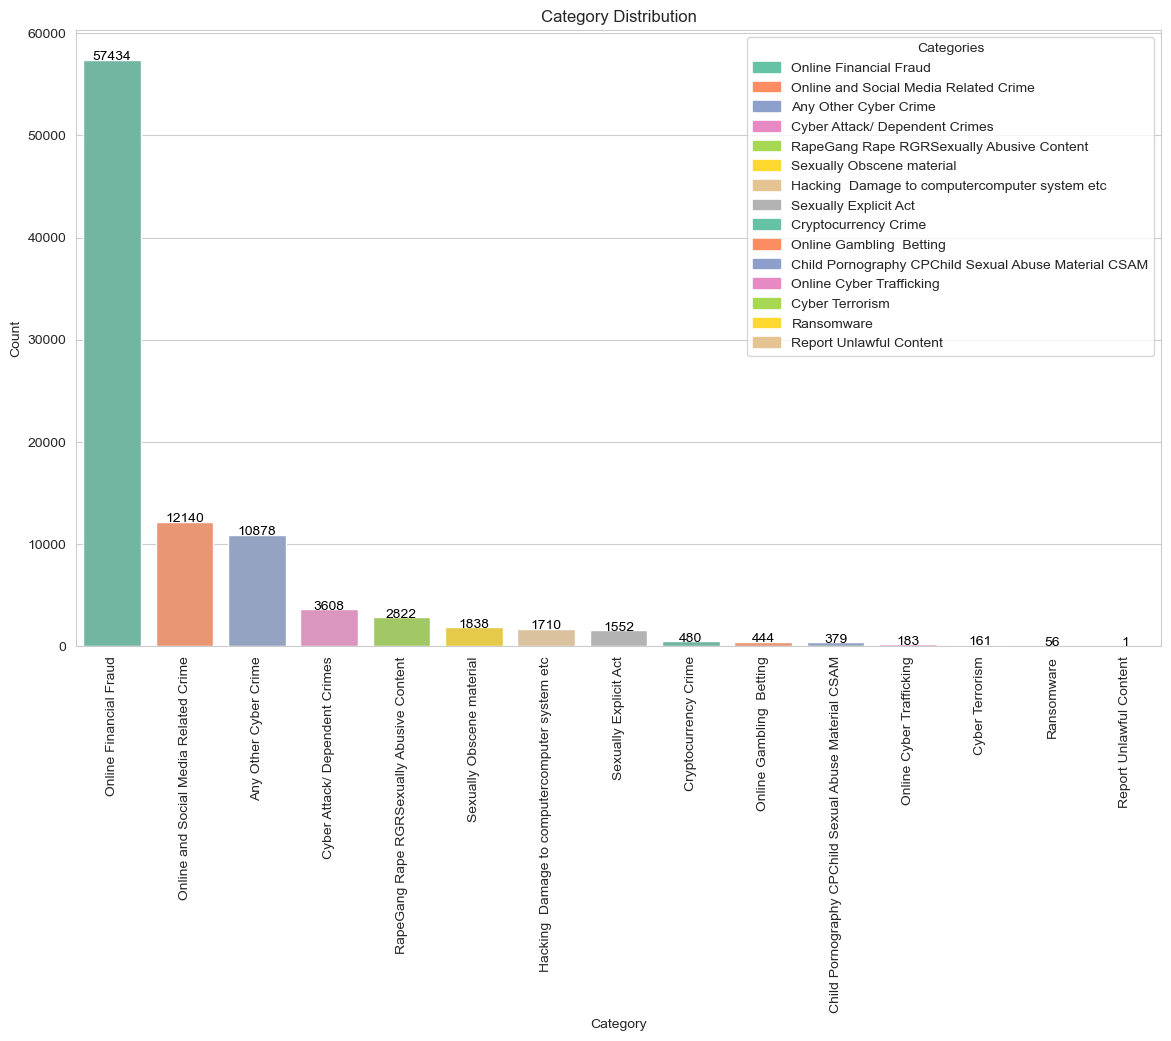

In [4]:
# Prepare the data
category_counts = data['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create a color palette with distinct colors for each category
palette = sns.color_palette('Set2', n_colors=len(category_counts))

# Create the bar plot with hue and disable the built-in legend
plt.figure(figsize=(14, 8))
sns.barplot(x='category', y='count', data=category_counts, hue='category', palette=palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

# Rotate the category names to be vertical
plt.xticks(rotation=90)

# Display the count on top of the bars
for index, row in category_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

# Add a legend manually for each category
legend_patches = [mpatches.Patch(color=palette[i], label=category_counts['category'][i]) for i in range(len(category_counts))]
plt.legend(handles=legend_patches, title='Categories')

# Show the plot
plt.show()

Pie Chart for Category Distribution

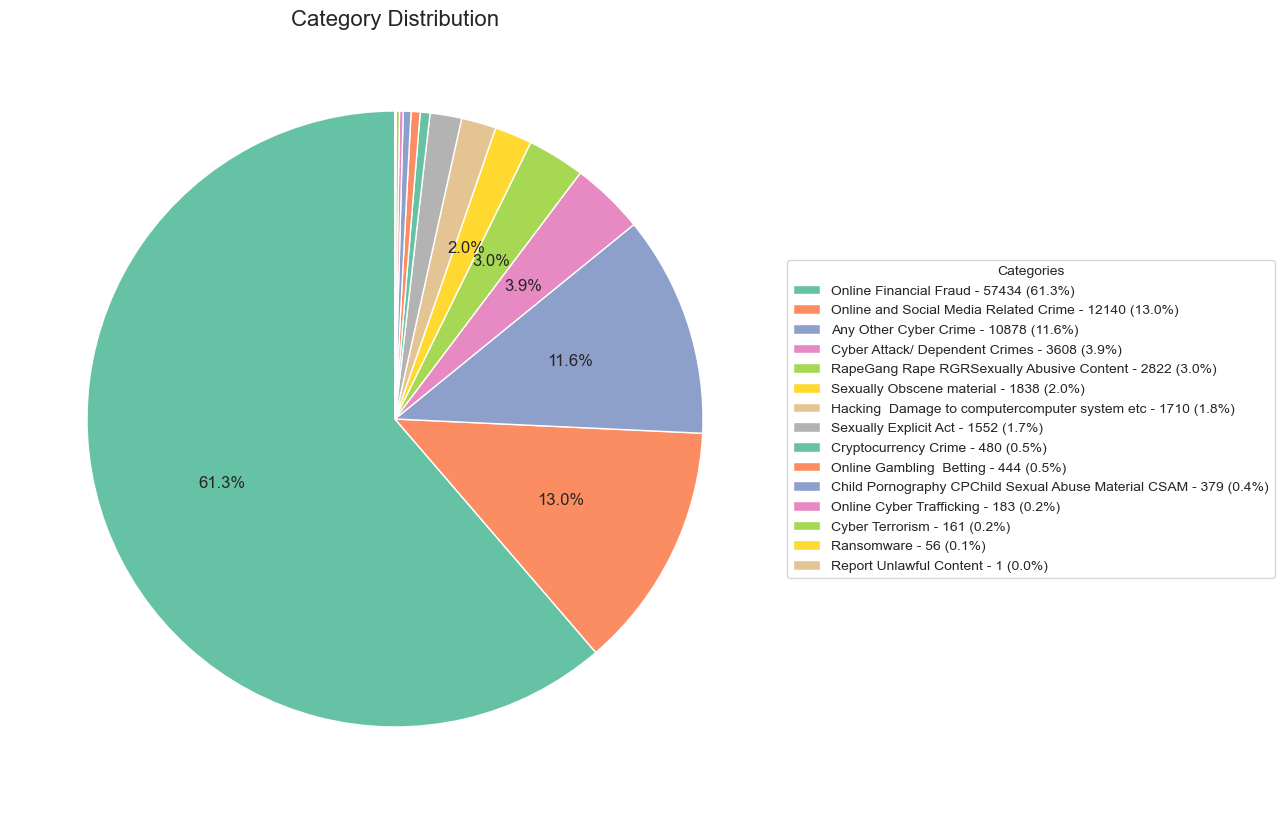

In [5]:
# Define a function to conditionally show percentages only for large slices
def autopct_function(pct):
        return ('%1.1f%%' % pct) if pct > 1.9 else ''  # Show percentage only if slice is larger than 5%

# Create the pie chart with conditional percentage labels
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(category_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Add space between slices

# Equal aspect ratio ensures that the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Category Distribution', fontsize=16)

# Add a legend with the category labels and their percentages
legend_labels = [f'{category_counts["category"][i]} - {category_counts["count"][i]} ({(category_counts["count"][i] / category_counts["count"].sum()) * 100:.1f}%)' for i in range(len(category_counts))]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

**Word Cloud for Category**

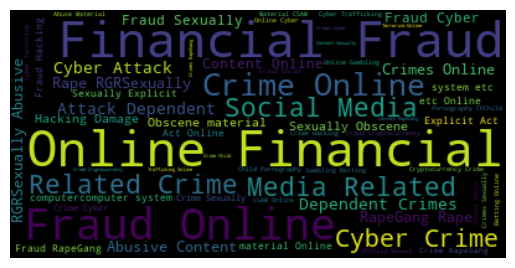

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(data['category']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusion

After the analysis on the 'category' feature, we can conclude that:
- The dataset is imbalanced.
- The distribution of the category is not uniform.
- The category 'Online Financial Fraud' has the highest frequency.
- Total number of categories are 15.